# Mindspore Basics

In [2]:
# !pip install mindspore

In [3]:
import mindspore

In [4]:
import numpy as np
from mindspore import Tensor
from mindspore import dtype

In [5]:
x = Tensor(np.array([[1,2],[3,4]]), dtype.int32)
x

Tensor(shape=[2, 2], dtype=Int32, value=
[[1, 2],
 [3, 4]])

In [6]:
y = Tensor(1.0, dtype.int32)
z = Tensor(2, dtype.int32)
y

Tensor(shape=[], dtype=Int32, value= 1)

In [7]:
m = Tensor(True, dtype.bool_)
m

Tensor(shape=[], dtype=Bool, value= True)

In [8]:
n = Tensor((1,2,3), dtype.int16)
n

Tensor(shape=[3], dtype=Int16, value= [1, 2, 3])

In [9]:
p = Tensor([4.0, 5.0, 6.0], dtype.float64)
p

Tensor(shape=[3], dtype=Float64, value= [ 4.00000000e+00,  5.00000000e+00,  6.00000000e+00])

In [10]:
from mindspore import ops
oneslike = ops.OnesLike()
x = Tensor(np.array([[0,1],[2,1]]).astype(np.int32))
output  = oneslike(x)
output

Tensor(shape=[2, 2], dtype=Int32, value=
[[1, 1],
 [1, 1]])

In [11]:
from mindspore.ops import operations as ops

shape = (2,2)
ones = ops.Ones()
output = ones(shape, dtype.float32)
output

Tensor(shape=[2, 2], dtype=Float32, value=
[[ 1.00000000e+00,  1.00000000e+00],
 [ 1.00000000e+00,  1.00000000e+00]])

In [12]:
zeros = ops.Zeros()
output = zeros(shape, dtype.float32)
output

Tensor(shape=[2, 2], dtype=Float32, value=
[[ 0.00000000e+00,  0.00000000e+00],
 [ 0.00000000e+00,  0.00000000e+00]])

In [13]:
x = Tensor(np.array([[1,2],[3,4]]), dtype.int32)

# x.shape
x.ndim
# x.size
x

Tensor(shape=[2, 2], dtype=Int32, value=
[[1, 2],
 [3, 4]])

In [14]:
y = Tensor(np.array([[True, True],[False, False]]), dtype.bool_)

y_array = y.asnumpy()

y

Tensor(shape=[2, 2], dtype=Bool, value=
[[ True,  True],
 [False, False]])

In [15]:
tensor = Tensor(np.array([[0,1],[2,3]]).astype(np.float32))
print("First row: {}, First column: {}, Last Column: {}".format(tensor[0], tensor[:,0], tensor[...,-1]))

First row: [0. 1.], First column: [0. 2.], Last Column: [1. 3.]


In [16]:
data1 = Tensor(np.array([[0,1], [2,3]]).astype(np.float32))
data2 = Tensor(np.array([[4,5],[6,7]]).astype(np.float32))
op = ops.Stack()
output = op([data1, data2])
print(output)

[[[0. 1.]
  [2. 3.]]

 [[4. 5.]
  [6. 7.]]]


zeros = ops.Zeros()
output = zeros((2,2), dtype.float32)
print("output: {}".format(type(output)))
n_output = output.asnumpy()
print("n_output: {}".format(type(n_output)))

## Loading a Dataset

In [17]:
import os
import mindspore.dataset as ds
import matplotlib.pyplot as plt

In [18]:
# from zipfile import ZipFile

# with ZipFile('/content/MNIST.zip', 'r') as zip_ref:
#     zip_ref.extractall('content')

In [19]:
dataset_dir = "/content/MNIST/train"
mnist_dataset = ds.MnistDataset(dataset_dir = dataset_dir, num_samples=3)

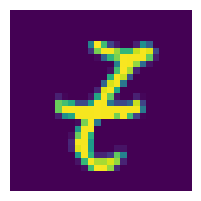

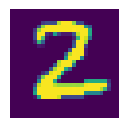

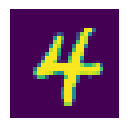

In [20]:
plt.figure(figsize=(8,8))
i=1
for dic in mnist_dataset.create_dict_iterator(output_numpy=True):
    plt.subplot(3,3,i)
    plt.imshow(dic["image"][:,:,0])
    plt.axis("off")
    i += 1
    plt.show()

### Customize a dataset

In [21]:
import numpy as np
np.random.seed(58)

class DatasetGenerator:
    def __init__(self):
        self._data = np.random.sample((5, 2))
        self._label = np.random.sample((5, 1))

    def __getitem__(self, index):
        return self._data[index], self._label[index]

    def __len__(self):
        return len(self._data)

dataset_generator = DatasetGenerator()
dataset = ds.GeneratorDataset(dataset_generator, ["data", "label"], shuffle = False)



In [22]:
for data in dataset.create_dict_iterator():
    print("{}".format(data["data"]), "{}".format(data["label"]))

[0.36510558 0.45120592] [0.78888122]
[0.49606035 0.07562207] [0.38068183]
[0.57176158 0.28963401] [0.16271622]
[0.30880446 0.37487617] [0.54738768]
[0.81585667 0.96883469] [0.77994068]


### Perform data augmentation

In [23]:
ds.config.set_seed(58)

dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(batch_size=2)

for data in dataset.create_dict_iterator():
    print("data {}".format(data["data"]), "label {}".format(["label"]))

data [[0.36510558 0.45120592]
 [0.57176158 0.28963401]] label ['label']
data [[0.30880446 0.37487617]
 [0.49606035 0.07562207]] label ['label']
data [[0.81585667 0.96883469]] label ['label']


Text(0.5, 1.0, '5')

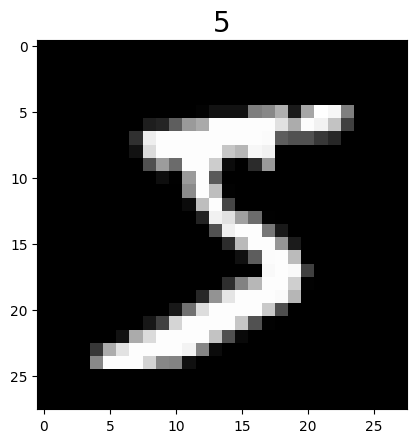

In [25]:
import matplotlib.pyplot as plt

# from mindspore.dataset.vision import inter
import mindspore.dataset.vision.c_transforms as c_vision

DATA_DIR = '/content/MNIST/train'

mnist_dataset = ds.MnistDataset(DATA_DIR, num_samples=6, shuffle=False)
mnist_it = mnist_dataset.create_dict_iterator()
data = next(mnist_it)

plt.imshow(data["image"].asnumpy().squeeze(), cmap=plt.cm.gray)
plt.title(data["label"].asnumpy(), fontsize=20)


## Building the network

### Build a fully connected layer

In [26]:
import mindspore as ms
import mindspore.nn as nn
from mindspore import Tensor
import numpy as np

#construct the input tensor
input_a = Tensor(np.array([[1,1,1],[2,2,2]]), ms.float32)
print(input_a)

#Construct a fully-connected network, settings both in_channels and out channels to 2
net = nn.Dense(in_channels = 3, out_channels=3, weight_init = 1)
output = net(input_a)
print(output)


[[1. 1. 1.]
 [2. 2. 2.]]
[[3.1284747 3.0900786 3.5357811]
 [6.1284747 6.0900784 6.5357814]]


### Build a convolutional layer

In [27]:
conv2d = nn.Conv2d(1, 6, 5, has_bias=False, weight_init='normal', pad_mode = 'valid')
input_x = Tensor(np.ones([1,1,32,32]), ms.float32)
print(conv2d(input_x).shape)

(1, 6, 28, 28)


### Build a ReLU layer

In [28]:
relu = nn.ReLU()
input_x = Tensor(np.array([-1, 2, -3, 2, -1]), ms.float16)
output = relu(input_x)

print(output)

[0. 2. 0. 2. 0.]


### Build a pooling layer

In [29]:
max_pool2D = nn.MaxPool2d(kernel_size=2, stride=2)
input_x = Tensor(np.ones([1,6,28,28]), ms.float32)

print(max_pool2D(input_x).shape)

(1, 6, 14, 14)


### Build a flatten layer

In [30]:
flatten = nn.Flatten()
input_x = Tensor(np.ones([1,16,5,5]), ms.float32)
output = flatten(input_x)

print(output.shape)

(1, 400)


### Define a model class and view parameters

In [31]:
import mindspore.nn as nn

class LeNet5(nn.Cell):
    """
    LeNet Network Structure - Fixed version
    """
    def __init__(self, num_class=10, num_channel=1):
        super(LeNet5, self).__init__()
        # Fixed: Changed from 15 to 16 output channels for conv2
        self.conv1 = nn.Conv2d(num_channel, 6, 5, pad_mode='valid')
        self.conv2 = nn.Conv2d(6, 16, 5, pad_mode='valid')

        # Calculate correct input size for fc1
        # Input: 28x28 -> conv1(5x5) -> 24x24 -> pool -> 12x12
        # -> conv2(5x5) -> 8x8 -> pool -> 4x4
        # So: 16 * 4 * 4 = 256
        self.fc1 = nn.Dense(16 * 4 * 4, 120)
        self.fc2 = nn.Dense(120, 84)
        self.fc3 = nn.Dense(84, num_class)

        self.relu = nn.ReLU()
        self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()

    def construct(self, x):
        #Use the defined operations to build a feedforward network.
        x = self.conv1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Instantiate and test
modelle = LeNet5()
for name, param in modelle.parameters_and_names():
    print(name, param.shape)


conv1.weight (6, 1, 5, 5)
conv2.weight (16, 6, 5, 5)
fc1.weight (120, 256)
fc1.bias (120,)
fc2.weight (84, 120)
fc2.bias (84,)
fc3.weight (10, 84)
fc3.bias (10,)


### Training and Validating the model

In [32]:
import numpy as np
import mindspore.nn as nn
from mindspore import Tensor
import mindspore.dataset as ds
import mindspore as ms

loss = nn.L1Loss()
output_data = Tensor(np.array([[1,2,3],[2,3,4]]).astype(np.float32))
target_data = Tensor(np.array([[0,2,5], [3,1,1]]).astype(np.float32))
print(loss(output_data, target_data))

1.5


### Use na optmiser

In [33]:
optim = nn.Momentum(params=modelle.trainable_params(), learning_rate=0.1,
                    momentum=0.9, weight_decay=0.0)

### Build a model

In [80]:
from mindspore import Model

#Define a neaural network
# Changed to use LeNet5 network
net = LeNet5()

#Define the loss function
loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')

#Define the optimizer
# Reduced the learning rate to 0.01
optim = nn.Momentum(params=net.trainable_params(), learning_rate=0.01,
                    momentum=0.9)

#Build a model
model = Model(network = net, loss_fn=loss, optimizer=optim, metrics={'accuracy'})

### Train the Model

In [41]:
import mindspore.dataset.transforms.c_transforms as C
import mindspore.dataset.vision.c_transforms as CV
from mindspore.train.callback import LossMonitor

In [42]:
mnist_dataset = ds.MnistDataset(DATA_DIR)

resize_op = CV.Resize((28,28))
rescale_op = CV.Rescale(1/255,0)
hwc2chw_op = CV.HWC2CHW()

mnist_dataset = mnist_dataset.map(input_columns='image',
                                  operations=[resize_op, rescale_op, hwc2chw_op])
mnist_dataset = mnist_dataset.map(input_columns='label', operations=C.TypeCast(ms.int32))
mnist_dataset = mnist_dataset.batch(32)
loss_cb = LossMonitor(per_print_times=1000)


[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-07:47:48.906.000 [mindspore/dataset/core/validator_helpers.py:744] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-07:47:48.910.000 [mindspore/dataset/core/validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-07:47:48.915.000 [mindspore/dataset/core/validator_helpers.py:744] 'HWC2CHW' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'HWC2CHW' from mindspore.dataset.vision instead.
[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-07:47:48.918.000 [mindspore/dataset/cor

In [43]:
model.train(epoch=1, train_dataset=mnist_dataset, callbacks=[loss_cb])

epoch: 1 step: 1000, loss is 0.12405446916818619


### Validate the model

In [46]:
#Test set
DATA_DIR = '/content/MNIST/test'
dataset = ds.MnistDataset(DATA_DIR)

resize_op = CV.Resize((28,28))
rescale_op = CV.Rescale(1/255,0)
hwc2chw_op = CV.HWC2CHW()
type_cast_op = C.TypeCast(ms.float32) # Add type casting to float32
int3cast_op = C.TypeCast(ms.int32) # Type casting for labels

mnist_dataset = dataset.map(input_columns='image',
                                  operations=[resize_op, rescale_op, hwc2chw_op, type_cast_op]) # Apply type casting to image
mnist_dataset = mnist_dataset.map(input_columns='label', operations=int3cast_op) # Apply type casting to labels
mnist_dataset = mnist_dataset.batch(32)
model.eval(valid_dataset=mnist_dataset) # Changed dataset to mnist_dataset for evaluation

[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-07:52:14.760.000 [mindspore/dataset/core/validator_helpers.py:744] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-07:52:14.762.000 [mindspore/dataset/core/validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-07:52:14.763.000 [mindspore/dataset/core/validator_helpers.py:744] 'HWC2CHW' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'HWC2CHW' from mindspore.dataset.vision instead.
[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-07:52:14.765.000 [mindspore/dataset/cor

{'accuracy': 0.9724}

## Saving and Loading Model

In [47]:
import mindspore as ms

#net indicates a defined network model, which is used before or after training
ms.save_checkpoint(net, "./MyNet.ckpt")
#net indicates the training network and ./MyNet.ckpt inidicates the path for saving the network model



In [52]:
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig

#Set the value of epoch_num
epoch_num =5

#Set model saving parameters
config_ck = CheckpointConfig(save_checkpoint_steps=1875, keep_checkpoint_max=10)

#use the model saving parameters
ckpoint = ModelCheckpoint(prefix='lenet', directory="./lenet", config=config_ck)
model.train(epoch_num, mnist_dataset, callbacks=[ckpoint])

## Automatic Differentiation

In [53]:
import numpy as np
import mindspore.nn as nn
import mindspore.ops as ops
from mindspore import Tensor
from mindspore import ParameterTuple, Parameter
from mindspore import dtype as mstype

In [56]:
class Net(nn.Cell):
    def __init__(self):
        super(Net, self).__init__()
        self.matmul = ops.MatMul()
        # Changed the shape of z for broadcasting
        self.z = Parameter(Tensor(np.array([[1,0,1]], np.float32)), name = 'z')

    def construct(self, x, y):
        x = x*self.z
        out = self.matmul(x,y)
        return out

class GradNetWrtx(nn.Cell):
    def __init__(self, net):
        super(GradNetWrtx, self).__init__()
        self.net = net
        self.grad_op = ops.GradOperation()

    def construct(self, x, y):
        gradient_function = self.grad_op(self.net)
        return gradient_function(x,y)

x = Tensor([[0.8,0.6,0.2],[1.8,1.3,1.1]], dtype=mstype.float32)
y = Tensor([[0.11,3.3,1.1],[1.1,0.2,1.4],[1.1,2.2,0.3]], dtype=mstype.float32)

output = GradNetWrtx(Net())(x,y)
print(output)

[[4.5099998 0.        3.6000001]
 [4.5099998 0.        3.6000001]]


In [60]:
class GraNetWrtx(nn.Cell):
    def __init__(self, net):
        super(GraNetWrtx, self).__init__()
        self.net = net
        self.params = ParameterTuple(net.trainable_params())
        self.grad_op = ops.GradOperation(get_all=True)

    def construct(self, x, y):
        gradient_function = self.grad_op(self.net, self.params)
        return gradient_function(x,y)

output = GraNetWrtx(Net())(x,y)
print(output)

(Tensor(shape=[2, 3], dtype=Float32, value=
[[ 4.50999975e+00,  0.00000000e+00,  3.60000014e+00],
 [ 4.50999975e+00,  0.00000000e+00,  3.60000014e+00]]), Tensor(shape=[3, 3], dtype=Float32, value=
[[ 2.59999990e+00,  2.59999990e+00,  2.59999990e+00],
 [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
 [ 1.30000007e+00,  1.30000007e+00,  1.30000007e+00]]))


# MNIST Handwritten Character Recognition

## Import the Modules

In [62]:
import os
from matplotlib import pyplot as plt
import numpy as np

import mindspore as ms
import mindspore.context as context
import mindspore.dataset as ds
import mindspore.dataset.transforms.c_transforms as C
import mindspore.dataset.vision.c_transforms as CV
from mindspore.nn.metrics import Accuracy
from mindspore import nn
from mindspore.train import Model
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig, LossMonitor, TimeMonitor

context.set_context(mode=context.GRAPH_MODE, device_target="CPU")

[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-08:12:22.497.000 [mindspore/context.py:1402] For 'context.set_context', the parameter 'device_target' will be deprecated and removed in a future version. Please use the api mindspore.set_device() instead.


## Read Data

In [64]:
DATA_DIR_TRAIN = '/content/MNIST/train'
DATA_DIR_TEST = '/content/MNIST/test'

#Read data
ds_train = ds.MnistDataset(DATA_DIR_TRAIN)
ds_test = ds.MnistDataset(DATA_DIR_TEST)

#Display dataset features
print('Data volume of the training dataset.', ds_train.get_dataset_size(), 'images')
print('Data volume of the testing dataset.', ds_test.get_dataset_size(), 'images')

image = ds_train.create_dict_iterator().__next__()

print('Image length/width/channels:', image['image'].shape)
print('Image label style:', image['label'])#Total 10 label classes which are rep'd by # from 0-9

Data volume of the training dataset. 60000 images
Data volume of the testing dataset. 10000 images
Image length/width/channels: (28, 28, 1)
Image label style: 3


## Process data

Datasets are crucial for training. A good dataset can effectively improve training accuracy and
efficiency. Generally, before loading a dataset, you need to perform some operations on the dataset.
Define a dataset and data operations.
We define the create_dataset function to create a dataset. In this function, we define the data
augmentation and processing operations to be performed:
- Read the dataset.
- Define parameters required for data augmentation and processing.
- Generate corresponding data augmentation operations according to the parameters.
- Use the map function to apply data operations to the dataset.
- Process the generated
dataset. Code:

In [65]:
def create_dataset(training=True, batch_size=128,
                   rezise=(28,28), rescale=1.255,
                   shift=0, buffer_size=64):
    ds = ms.dataset.MnistDataset(DATA_DIR_TRAIN if training else DATA_DIR_TEST)
    #define the resize, renormalisation, and channel conversion of the map operation
    resize_op = CV.Resize(rezise)
    rescale_op = CV.Rescale(rescale, shift)
    hwc2chw_op = CV.HWC2CHW()
    #Perform the map operation on the dataset
    ds = ds.map(input_columns='image', operations=[resize_op, rescale_op, hwc2chw_op])
    ds = ds.map(input_columns='label', operations=C.TypeCast(ms.int32))
    #set the shuffle parameter and batch_size
    ds = ds.shuffle(buffer_size=buffer_size) if training else ds
    ds = ds.batch(batch_size, drop_remainder=True)
    return ds

In the preceding information, batch_size indicates the number of data records in each batch.
Assume that each batch contains 32 data records. Modify the image size, normalization, and image
channel, and then modify the data type of the label. Perform the shuffle operation, set batch_size,
and set drop_remainder to True. In this case, data that cannot form a batch in the dataset will be
discarded.
MindSpore supports multiple data processing and augmentation operations, which are usually used
together. For details, see Data Processing and Augmentation on the MindSpore official website.

## Sample Visualization

Read the first 10 samples and visualize the samples to determine whether the samples are real
datasets.
Code:

[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-08:35:09.990.00 [mindspore/dataset/core/validator_helpers.py:744] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-08:35:09.100.000 [mindspore/dataset/core/validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-08:35:09.101.000 [mindspore/dataset/core/validator_helpers.py:744] 'HWC2CHW' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'HWC2CHW' from mindspore.dataset.vision instead.
[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-08:35:09.102.000 [mindspore/dataset/core

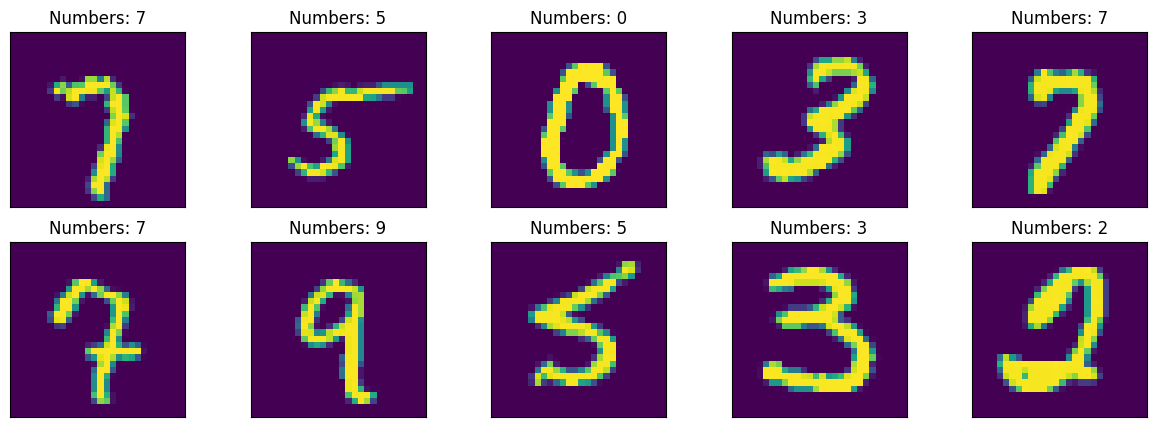

In [70]:
#Display the first 10 images and the labels and check whether the images are correctly labelled
ds = create_dataset(training=False)

# Get the first batch of data
data = ds.create_dict_iterator().__next__()
images = data['image'].asnumpy()
labels = data['label'].asnumpy()

plt.figure(figsize=(15,5))
# Iterate through the first 10 images in the batch
for i in range(10):
    plt.subplot(2,5,i+1)
    # Access individual image and label from the batch
    plt.imshow(np.squeeze(images[i]))
    plt.title('Numbers: %s' % (labels[i],))
    plt.xticks([])
    plt.yticks([]) #remove y-axis ticks for cleaner display

plt.show()

# Define a network

We define a simple fully-connected network to implement image recognition. The network has only
three layers:
The first layer is a fully-connected layer of the shape 784 x 512.
The second layer is a fully-connected layer of the shape 512 x 128.
The last layer is an output layer of the shape 128 x 10.
To use MindSpore for neural network definition, inherit mindspore.nn.Cell. Cell is the base class of
all neural networks (such as Conv2d).
Define each layer of a neural network in the init method in advance, and then define the
construct method to complete the feedforward construction of the neural network. The network
layers are defined as follows:
Code:

In [79]:
#Create a model. The model consists of three fully connected layers. THe final output layer
#uses softmax for classification(10 classes consisting of number 0-9

class ForwardNN(nn.Cell):
    def __init__(self):
        super(ForwardNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Dense(784, 512, activation = 'relu')
        self.fc2 = nn.Dense(512, 128, activation = 'relu')
        self.fc3 = nn.Dense(128, 10, activation = None)

    def construct(self, x):
        # Add print statement to check the shape before flattening
        print("Shape before flatten:", x.shape)
        output = self.flatten(x)
        output = self.fc1(output)
        output = self.fc2(output)
        output = self.fc3(output)
        return output

## Define a loss function and an optimiser

A loss function is also called an objective function and is used to measure the difference between a
predicted value and an actual value. Deep learning reduces the loss value by continuous iteration.
Defining a good loss function can effectively improve model performance.
An optimizer is used to minimize the loss function, improving the model during training.
After the loss function is defined, the weight-related gradient of the loss function can be obtained.
The gradient is used to indicate the weight optimization direction for the optimizer, improving model
performance. Loss functions supported by MindSpore include SoftmaxCrossEntropyWithLogits,
L1Loss, and MSELoss. SoftmaxCrossEntropyWithLogits is used in this example.
MindSpore provides the callback mechanism to execute custom logic during training. The following
uses ModelCheckpoint provided by the framework as an example. ModelCheckpoint can save the
network model and parameters for subsequent fine-tuning.
Code:

In [84]:
#Create a network, loss function, validation metric, and optimizer, and set
# related hyperparameters

lr = 0.0001
num_epoch = 10
momentum = 0.9

net = ForwardNN()
loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')
metrics = {'Accuracy':Accuracy()}
opt = nn.Momentum(net.trainable_params(), lr, momentum)

##Start training

The training process refers to a process in which a training dataset is transferred to a network for
training and optimizing network parameters. In the MindSpore framework, the Model.train method
is used to complete this process.
Code:

In [85]:
#Build a model
model = Model(net, loss, opt, metrics)

config_ck = CheckpointConfig(save_checkpoint_steps=1875, keep_checkpoint_max=10)
ckpoint = ModelCheckpoint(prefix='checlpoint_net', directory='./mnist', config=config_ck)

#Generate a dataset
ds_eval = create_dataset(False, batch_size=32)
ds_train = create_dataset(batch_size=32)

#train the model
loss_cb = LossMonitor(per_print_times=1875)
time_cb = TimeMonitor(data_size=ds_train.get_dataset_size())
print('================Starting Training===============')
model.train(num_epoch, ds_train, callbacks=[ckpoint, loss_cb, time_cb], dataset_sink_mode=False)

[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-08:59:47.514.000 [mindspore/dataset/core/validator_helpers.py:744] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-08:59:47.515.000 [mindspore/dataset/core/validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-08:59:47.517.000 [mindspore/dataset/core/validator_helpers.py:744] 'HWC2CHW' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'HWC2CHW' from mindspore.dataset.vision instead.
[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-08:59:47.518.000 [mindspore/dataset/cor

================Starting Training===============
epoch: 1 step: 1875, loss is 0.15741178393363953
Train epoch time: 18604.306 ms, per step time: 9.922 ms
epoch: 2 step: 1875, loss is 0.016643444076180458
Train epoch time: 17554.758 ms, per step time: 9.363 ms
epoch: 3 step: 1875, loss is 0.4704572558403015
Train epoch time: 18164.604 ms, per step time: 9.688 ms
epoch: 4 step: 1875, loss is 0.015206046402454376
Train epoch time: 17500.094 ms, per step time: 9.333 ms
epoch: 5 step: 1875, loss is 0.0017230320954695344
Train epoch time: 17320.146 ms, per step time: 9.237 ms
epoch: 6 step: 1875, loss is 0.01042992901057005
Train epoch time: 17922.408 ms, per step time: 9.559 ms
epoch: 7 step: 1875, loss is 0.08602961897850037
Train epoch time: 16926.491 ms, per step time: 9.027 ms
epoch: 8 step: 1875, loss is 0.0009003045852296054
Train epoch time: 17434.208 ms, per step time: 9.298 ms
epoch: 9 step: 1875, loss is 0.0017388664418831468
Train epoch time: 18460.421 ms, per step time: 9.846 ms

## Validate the model

In [86]:
#Use test set to validate the model and print the overall accuracy

metrics=model.eval(ds_eval)
print(metrics)

{'Accuracy': 0.9765625}


# 3 MobileNetV2 Image Classification

## Introduction

In this section, we will use the lightweight convolutional neural network **MobileNetV2** to classify images from a flower dataset. The dataset contains five categories of flowers: **daisies**, **dandelions**, **roses**, **sunflowers**, and **tulips** — totaling **3670 images** across all classes.

The images are organized into training and testing sets, each with the following structure:

```
flower_photos_train/
├── daisy/
├── dandelion/
├── roses/
├── sunflowers/
├── tulips/
├── LICENSE.txt

flower_photos_test/
├── daisy/
├── dandelion/
├── roses/
├── sunflowers/
├── tulips/
├── LICENSE.txt
```

The goal of this notebook is to build and train a MobileNetV2-based classifier that can accurately recognize and categorize flower images. We'll handle data loading, preprocessing, model construction, training, and finally evaluate the model's performance on the test set.

## Load the dataset

In [88]:
import zipfile

with zipfile.ZipFile("/content/flower_photos.zip", "r") as zip_ref:
    zip_ref.extractall("/content")


In [89]:
import mindspore.dataset as ds
import mindspore.dataset.vision.c_transforms as CV
from mindspore import dtype as mstype

train_data_path = '/content/flower_photos/flower_photos_train'
val_data_path = '/content/flower_photos/flower_photos_test'


In [93]:
def create_dataset(data_path, batch_size=18, training=True):
  """Define the Dataset"""
  # Reduced num_parallel_workers to 2 as per error message
  data_set = ds.ImageFolderDataset(data_path, num_parallel_workers=2, shuffle=True,
                                   class_indexing={'daisy':0,'dandelion':1,'roses':2,
                                                   'sunflowers':3, 'tulips':4})

  #Perform image enhancement on the dataset
  image_size = 224
  mean = [0.485*255, 0.465*255, 0.406*255]
  std = [0.229*255, 0.224*255, 0.225*255]

  if training:
    trans = [
        CV.RandomCropDecodeResize(image_size, scale=(0.08, 1.0), ratio=(0.75, 1.333)),
        CV.RandomHorizontalFlip(prob=0.5),
        CV.Normalize(mean=mean, std=std),
        CV.HWC2CHW()]
  else:
    trans = [
        CV.Decode(),
        CV.Resize(256),
        CV.CenterCrop(image_size),
        CV.Normalize(mean=mean, std=std),
        CV.HWC2CHW()]

  #perform the data map, batch and repeat operations
  data_set = data_set.map(operations=trans, input_columns="image", num_parallel_workers=2) # Also reduced here
  #set the value of the batch_size. Discard the samples if the number of samples last fetched is less than the value of batch size
  data_set = data_set.batch(batch_size, drop_remainder=True)
  return data_set

In [94]:
dataset_train = create_dataset(train_data_path)
dataset_val = create_dataset(val_data_path, training=False)

[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-09:51:08.206.000 [mindspore/dataset/core/validator_helpers.py:744] 'RandomCropDecodeResize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'RandomCropDecodeResize' from mindspore.dataset.vision instead.
[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-09:51:08.207.000 [mindspore/dataset/core/validator_helpers.py:744] 'RandomHorizontalFlip' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'RandomHorizontalFlip' from mindspore.dataset.vision instead.
[WARNING] ME(769:137485296553984,MainProcess):2025-07-19-09:51:08.208.000 [mindspore/dataset/core/validator_helpers.py:744] 'Normalize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Normalize' from mindspore.dataset.vision instead.
[WARNING] ME(769:137485296553984,M

## Visualize the dataset

Tensor of image (18, 3, 224, 224)
Labels: [1 4 2 0 4 1 1 1 4 2 1 0 0 3 0 0 0 1]


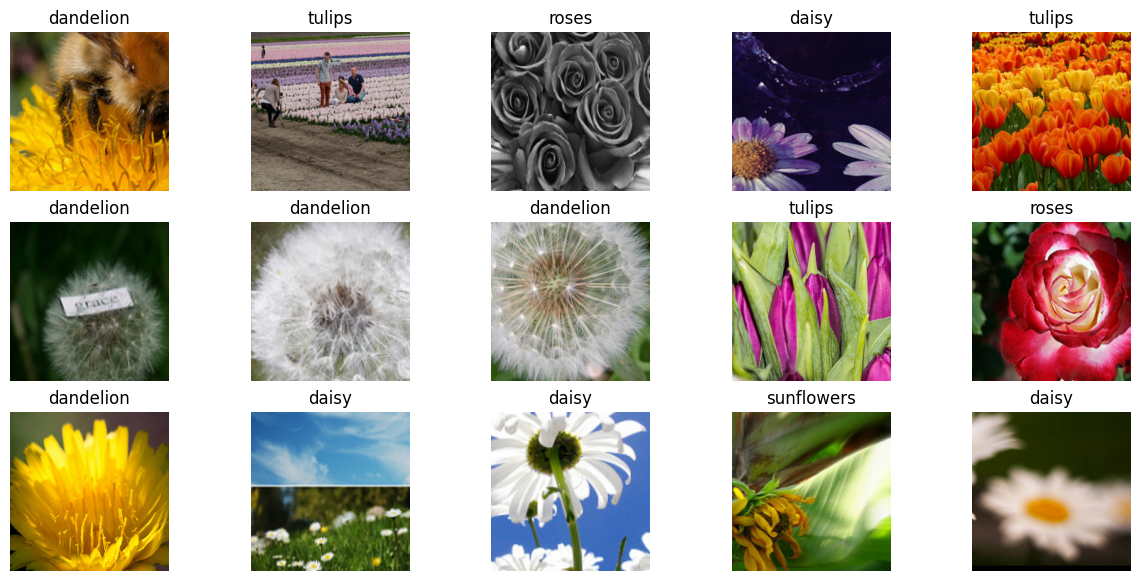

In [97]:
import matplotlib.pyplot as plt
import numpy as np

data = next(dataset_train.create_dict_iterator())
images=data['image']
labels=data['label']

print('Tensor of image', images.shape)
print('Labels:', labels)

#class_name corresponds to label. Labels are marked in ascending order of the folder character string,
# Create a dictionary to map integer labels to class names
idx_to_class = {0:'daisy', 1:'dandelion', 2:'roses', 3:'sunflowers', 4:'tulips'}

plt.figure(figsize=(15,7))
# Iterate through the first 15 images in the batch (or fewer if batch size is less than 15)
for i in range(min(len(labels), 15)):
  #obtain an image and its label
  data_image = images[i].asnumpy()
  data_label = labels[i]
  #process images for display
  data_image = np.transpose(data_image, (1,2,0))
  mean = np.array([0.485, 0.465, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  data_image = std * data_image + mean
  data_image = np.clip(data_image, 0, 1)
  #Display the image
  plt.subplot(3,5,i+1)
  plt.imshow(data_image)
  # Use the new dictionary for lookup
  plt.title(idx_to_class[int(labels[i].asnumpy())])
  plt.axis('off')
plt.show()

## Create a MobileNetV2 model

Datasets are crucial for training. A good dataset can effectively improve training accuracy and
efficiency. MobileNet is a lightweight CNN proposed by Google in 2017 to focus on mobile,
embedded, and IoT devices. Compared with traditional convolutional neural networks, MobileNet
uses depthwise separable convolution to greatly reduce the model parameters and computation
amount with a slight decrease in accuracy. In addition, the width coefficient α and resolution
coefficient β are introduced to meet the requirements of different application
 scenarios.
Because a large amount of data is lost when the ReLU activation function in the MobileNet processes
low-dimensional feature information, the MobileNetV2 proposes to use an inverted residual block
and Linear Bottlenecks to design the network, improving the accuracy of the model and making the
optimized model smaller.
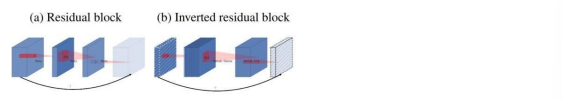

In the inverted residual block structure, the 1 x 1 convolution is used for dimension increase, the 3 x
3 depthwise convolution is used, and the 1 x 1 convolution is used for dimension reduction. This
structure is opposite to the residual block structure. For the residual block, the 1 x 1 convolution is
first used for dimension reduction, then the 3 x 3 convolution is used, and finally the 1 x 1
convolution is used for dimension increase.
For details, see the MobileNetV2 paper at https://arxiv.org/pdf/1801.04381.pdf.
Code:

In [100]:
import numpy as np
import mindspore as ms
import mindspore.nn as nn
import mindspore.ops as ops

def _make_divisible(v, divisor, min_value=None):
    if min_value is None:
        min_value = divisor
    new_v = max(min_value, int(v + divisor / 2) // divisor * divisor)
    #Make sure that round down does not go down by more than 10%
    if new_v < 0.9 * v:
        new_v += divisor
    return new_v

# Corrected nn.cell to nn.Cell
class GlobalAvgPooling(nn.Cell):
    def __init__(self):
        super(GlobalAvgPooling, self).__init__()
        self.mean = ops.ReduceMean(keep_dims=False)

    def construct(self, x):
        return self.mean(x, (2, 3))

# Corrected nn.cell to nn.Cell
class ConvBNReLU(nn.Cell):
    def __init__(self, in_planes, out_planes, kernel_size=3, stride=1, groups=1):
      super(ConvBNReLU, self).__init__()
      padding = (kernel_size - 1) // 2
      in_channels = in_planes
      out_channels = out_planes
      if groups == 1:
        conv = nn.Conv2D(in_channels, out_channels, kernel_size, stride, pad_mode='pad', padding = padding)
      else:
        out_channels = in_planes
        conv = nn.Conv2D(in_channels, out_channels, kernel_size, stride, pad_mode='pad', padding = padding, group=in_channels)
      layers = [conv, nn.BatchNorm2d(out_planes), nn.ReLU6()]
      self.features = nn.SequentialCell(layers)

      # Added construct method
      def construct(self, x):
        output = self.features(x)
        return output

# Corrected nn.cell to nn.Cell and other typos
class InvertedResidual(nn.Cell):

  def __init__(self, inp, oup, stride, expand_ratio):
    super(InvertedResidual, self).__init__() # Corrected super call
    assert stride in [1,2]

    hidden_dim = int(round(inp*expand_ratio))
    self.use_res_connect = stride == 1 and inp == oup # Corrected 'output' to 'oup'

    layers = []
    if expand_ratio != 1:
      layers.append(ConvBNReLU(inp, hidden_dim, kernel_size=1))
    layers.extend([
        #dw
        ConvBNReLU(hidden_dim, hidden_dim, stride=stride, groups=hidden_dim), # Added stride
        #pw-linear
        nn.Conv2d(hidden_dim, oup, kernel_size=1, stride=1,has_bias=False), # Corrected nn.Con2d to nn.Conv2d
        nn.BatchNorm2d(oup),
        ])
    self.conv = nn.SequentialCell(layers)
    self.add=ops.Add()
    self.cast = ops.Cast()

  def construct(self, x):
    identity = x
    x = self.conv(x)
    if self.use_res_connect:
      return self.add(identity, x)
    return x


class MobileNetV2Backbone(nn.Cell):
    def __init__(self, width_mult=1., inverted_residual_setting=None, round_nearest=8,
                 input_channel=32, last_channel=1280):
        super(MobileNetV2Backbone, self).__init__()
        block = InvertedResidual
        # setting of inverted residual blocks
        self.cfgs = inverted_residual_setting
        if inverted_residual_setting is None:
            self.cfgs = [
                # t, c, n, s
                [1, 16, 1, 1],
                [6, 24, 2, 2],
                [6, 32, 3, 2],
                [6, 64, 4, 2],
                [6, 96, 3, 1],
                [6, 160, 3, 2],
                [6, 320, 1, 1],
            ]

        # building first layer
        input_channel = _make_divisible(input_channel * width_mult, round_nearest)
        self.out_channels = _make_divisible(last_channel * max(1.0, width_mult), round_nearest)
        features = [ConvBNReLU(3, input_channel, stride=2)]

        # building inverted residual blocks
        for t, c, n, s in self.cfgs:
            output_channel = _make_divisible(c * width_mult, round_nearest)
            for i in range(n):
                stride = s if i == 0 else 1
                features.append(block(input_channel, output_channel, stride, expand_ratio=t))
                input_channel = output_channel

        # building last several layers
        features.append(ConvBNReLU(input_channel, self.out_channels, kernel_size=1))
        self.features = nn.SequentialCell(features)

    def _initialize_weights(self):
        self.init_parameters_data()
        for _, m in self.cells_and_names():
            if isinstance(m, nn.Conv2d):
                m.weight.set_data(ms.Tensor(np.random.normal(0, m.out_channels ** -0.5,
                                        m.weight.data.shape).astype("float32")))
                if m.bias is not None:
                    m.bias.set_data(
                        ms.Tensor(np.zeros(m.bias.data.shape, dtype="float32")))
            elif isinstance(m, nn.BatchNorm2d):
                m.gamma.set_data(
                    ms.Tensor(np.ones(m.gamma.data.shape, dtype="float32")))
                m.beta.set_data(
                    ms.Tensor(np.zeros(m.beta.data.shape, dtype="float32")))

    @property
    def get_features(self):
        return self.features


class MobileNetV2Head(nn.Cell):
    def __init__(self, input_channel=1280, num_classes=1000, has_dropout=False, activation="None"):
        super(MobileNetV2Head, self).__init__()
        # mobilenet head
        head = [GlobalAvgPooling()] if not has_dropout else \
               [GlobalAvgPooling(), nn.Dropout(0.2)]
        self.head = nn.SequentialCell(head)
        self.enddense = nn.Dense(input_channel, num_classes, has_bias=True)
        self.end_activation = True

        if activation == "Sigmoid":
            self.act = ops.Sigmoid()
        elif activation == "Softmax":
            self.act = ops.Softmax()
        else:
            self.end_activation = False

        self._initialize_weights()

    def construct(self, x):
        x = self.head(x)
        x = self.enddense(x)
        if self.end_activation:
            x = self.act(x)
        return x

    def _initialize_weights(self):
        self.init_parameters_data()
        for _, m in self.cells_and_names():
            if isinstance(m, nn.Dense):
                m.weight.set_data(ms.Tensor(np.random.normal(
                    0, 0.01, m.weight.data.shape).astype("float32")))
                if m.bias is not None:
                    m.bias.set_data(
                        ms.Tensor(np.zeros(m.bias.data.shape, dtype="float32")))


class MobileNetV2Combine(nn.Cell):
    def __init__(self, backbone, head):
        super(MobileNetV2Combine, self).__init__(auto_prefix=False)
        self.backbone = backbone
        self.head = head

    def construct(self, x):
        x = self.backbone(x)
        x = self.head(x)
        return x


def mobilenet_v2(num_classes):
    backbone_net = MobileNetV2Backbone()
    head_net = MobileNetV2Head(backbone_net.out_channels, num_classes)
    return MobileNetV2Combine(backbone_net, head_net)